In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [3]:
df = pd.read_excel('data_Finel.xlsx')
df.head()

,Field of activity,Process / Machine / Equipement,Risk Related,Risk Causes,Risk Effects,Severity (1-10),Occurrence (1-10),Impact (1-10),Criticality (Severity * Occurrence * Impact)
0,Office administrative / support/ other busines...,Production,Operator error,Insufficient training,Damage to machinery,7,8,9,504
1,Automotive industry,Production,Improper use of extension cords,"Overloading, improper connections","Fire, equipment damage",4,7,10,280
2,Dyeing of textile and clothing,Management,Leadership turnover,High executive turnover,Decreased morale,8,5,1,40
3,Financial services incl. Insurance business,Production,Calibration errors,Poor calibration practices,Inconsistent product quality,5,6,3,90
4,Actitivities of membership organisations,Compliance,Non-compliance with labor laws,Lack of awareness,Legal penalties,7,4,7,196


In [4]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Field of activity', 'Process / Machine / Equipement', 'Risk Related', 'Risk Causes', 'Risk Effects'
])

# Separate features and target
X = df_encoded.drop(columns=['Criticality (Severity * Occurrence * Impact)'])
y = df_encoded['Criticality (Severity * Occurrence * Impact)']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [6]:
from tensorflow.keras.layers import Dense, BatchNormalization
# Define the model with Batch Normalization
mlp_bn_model = Sequential()
mlp_bn_model.add(Dense(64, activation='relu'))
mlp_bn_model.add(BatchNormalization())
mlp_bn_model.add(Dense(32, activation='relu'))
mlp_bn_model.add(BatchNormalization())
mlp_bn_model.add(Dense(16, activation='relu'))
mlp_bn_model.add(BatchNormalization())
mlp_bn_model.add(Dense(1))  # Output layer

# Compile the model
mlp_bn_model.compile(optimizer='adam', loss='mse')

# Train the model
mlp_bn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = mlp_bn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred_mlp_bn = mlp_bn_model.predict(X_test)

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 56635.2695 - val_loss: 42874.5195
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 41206.3789 - val_loss: 23820.2383
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22268.4277 - val_loss: 9358.3438
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9510.8750 - val_loss: 1448.7305
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3995.4556 - val_loss: 463.9885
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2575.5781 - val_loss: 134.1110
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1986.8158 - val_loss: 352.9847
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1585.7512 - val_loss: 427.5027
Epoch 9/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1751.7356 - val_loss: 144.2795
Epoch 10/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1480.0403 - val_loss: 162.1953
Epoch 11/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1383.7037 - val_los

In [7]:
# Compare predictions to actual values
comparison_mlp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp_bn.flatten()})
comparison_mlp.head()

,Actual,Predicted
28260,10.0,8.169179
15601,224.0,231.233032
7839,54.0,49.439011
4850,126.0,128.903458
4699,135.0,133.478790


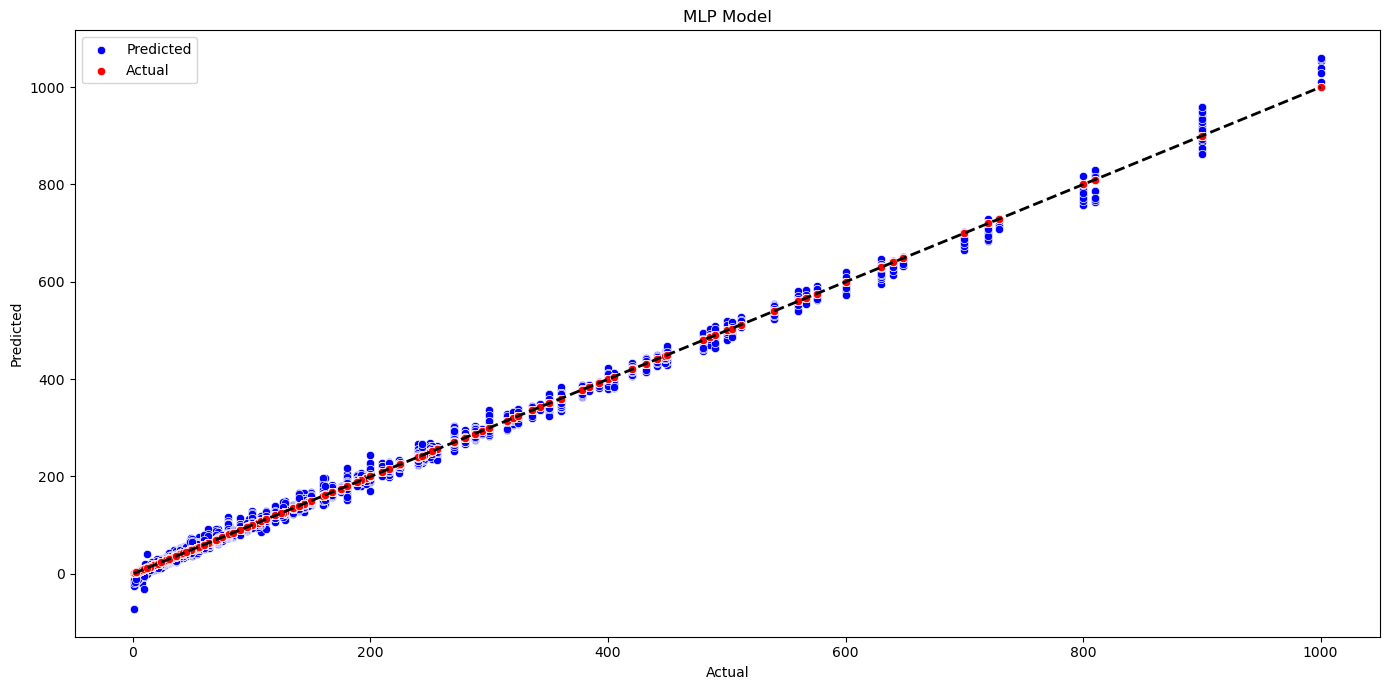

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# MLP Model
plt.subplot(1, 1, 1)

# Plot predicted values in blue
sns.scatterplot(x=y_test, y=y_pred_mlp_bn.flatten(), color='blue', label='Predicted')

# Plot actual values in red
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')

# Plot the identity line (45-degree line) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Model')

# Show legend
plt.legend()

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

In [9]:
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred_mlp_bn)
print(f"  MLP Model Metrics:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R^2 Score: {r2}\n")

  MLP Model Metrics:
  Mean Absolute Error (MAE): 5.420154571533203
  Mean Squared Error (MSE): 62.486572265625
  Root Mean Squared Error (RMSE): 7.904844760894775
  R^2 Score: 0.9978292291183543



In [10]:
import joblib
joblib.dump(mlp_bn_model, 'mlp_bn_model.joblib')

['mlp_bn_model.joblib']